In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from os.path import exists
import os
from scipy.interpolate import interp1d

In [2]:
mods = ('bgr', 'bgr_PreImageNet', 'bgrn1', 'all8')
mod_labels = ('B-G-R', 'B-G-R Image Net', 'B-G-R-N1', 'All 8')

auc, f1, loss, mAP = [], [], [], []
for m in mods:
    fld = f'./files_MS_aug_{m}'
    
    auc_fi = os.path.join(fld, f'auc_{m}_ms_aug_ep500_step8000_b32.txt')
    f1_fi = os.path.join(fld, f'f1_{m}_ms_aug_ep500_step8000_b32.txt')
    ep_loss_fi = os.path.join(fld, f'losses_ep_{m}_ms_aug_ep500_step8000_b32.txt')
    mAP_fi = os.path.join(fld, f'mAP_{m}_ms_aug_ep500_step8000_b32.txt')
    
    auc.append(np.loadtxt(auc_fi))
    f1.append(np.loadtxt(f1_fi))
    loss.append(np.loadtxt(ep_loss_fi))
    mAP.append(np.loadtxt(mAP_fi))
    
auc = np.array(auc)
f1 = np.array(f1)
loss = np.array(loss)
mAP = np.array(mAP)

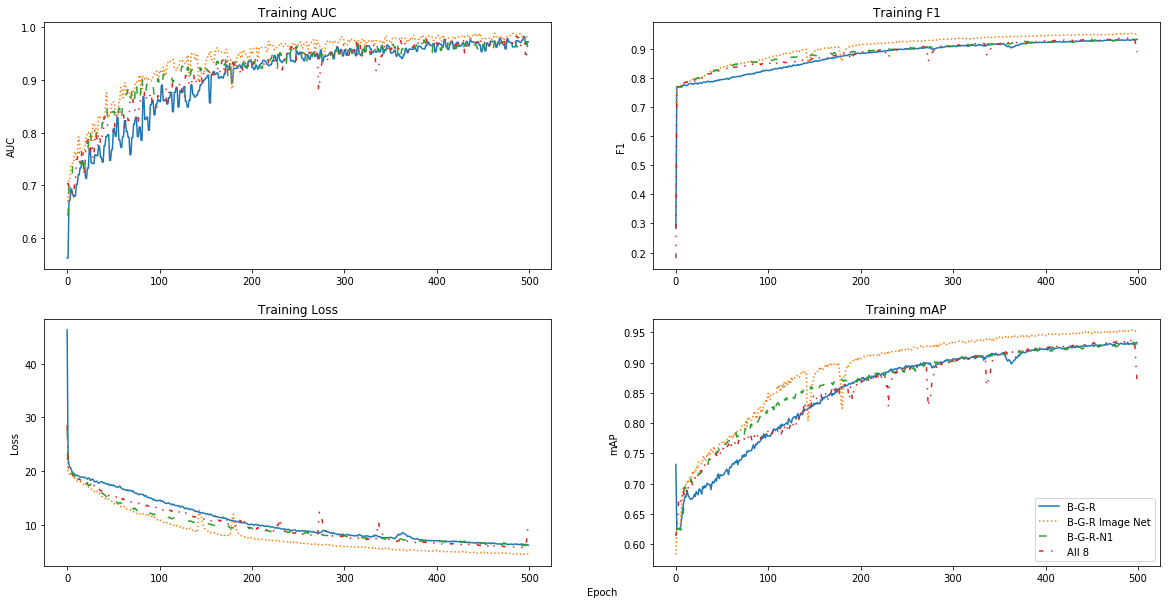

In [3]:
lstyles = ('solid', 'dotted', (0, (5, 10)), (0, (3, 5, 1, 5, 1, 5)))
fig, ax = plt.subplots(2,2,figsize=(20,10), sharex=False)
ax = ax.ravel()

for i,m,arr,score in zip(range(4), mod_labels, (auc, f1, loss, mAP), ('AUC', 'F1', 'Loss', 'mAP')):
    if i == 0:
        for j,l in enumerate(lstyles):
            lines = ax[i].plot(np.repeat(arr, repeats=2, axis=1).T[:,j], linestyle=l) # AUC recorded every other epoch
            ax[i].set_title(f'Training {score}')
            ax[i].set_ylabel(f'{score}')
            #ax[i].legend(lines, mod_labels)
    else:
        lines = []
        for j,l in enumerate(lstyles):
            line = ax[i].plot(arr.T[:,j], linestyle=l)
            ax[i].set_title(f'Training {score}')
            ax[i].set_ylabel(f'{score}')
            #ax[i].legend(lines, mod_labels)
            
            lines += [line[0]]

ax[i].legend(lines, mod_labels) # put the legend on the last one
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Epoch')
plt.show()